<a href="https://colab.research.google.com/github/PuroshotamSingh/Ted-talk-views-prediction/blob/main/Ted_Talk_Views_Prediction_Puroshotam_Singh_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ted Talk Views Prediction**

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset and creating dataframe
df = pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

# Let's do some EDA.

In [3]:
# Printing shape of dataset

df.shape

(4005, 19)

* **No of records: 4005**
* **No of columns: 19**

In [4]:
# Basic info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o



## *   In our dataset, we have only 4 numerical columns and rest all columns are either categorical or they contains textual data.
## *   Out of 4 numerical columns, 1 is target variable.

# So, we need to create some numerical columns from columns of object dtype.



In [5]:
# First 5 rows of dataset

df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


# Let's check for null values.

In [6]:
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

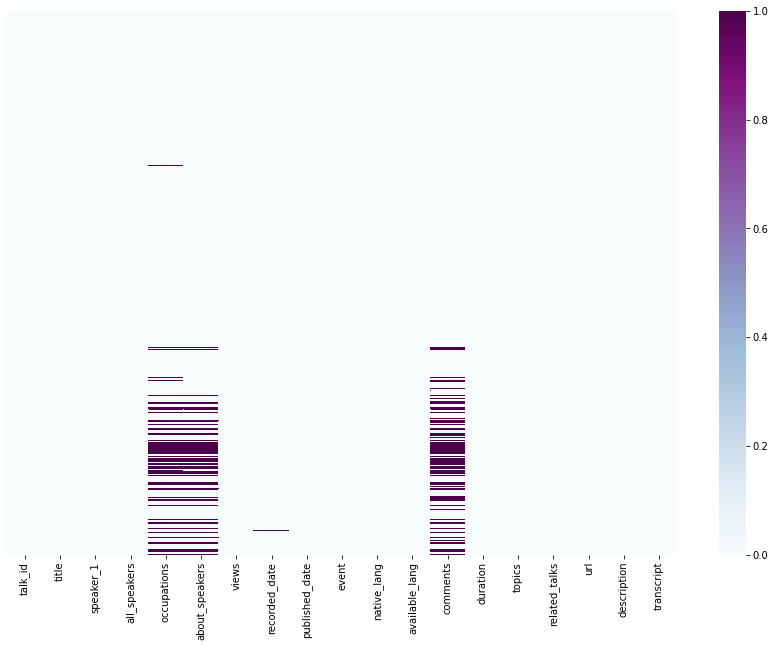

In [7]:
# Heatmap to check missing data in dataset

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [8]:
# Dropping url column as it is of no use

df = df.drop(columns=['url'])

## Let's check for duplicated rows.

In [9]:
df.duplicated().sum()

0

## Great! dataset does not contain any duplicate rows.

## Let's remove all_speakers, occupations, about_speakers columns from our dataset as they are not so important.

In [10]:
df = df.drop(['all_speakers', 'about_speakers', 'occupations'], axis=1)

In [11]:
# Checking total null values once again.

df.isna().sum()

talk_id             0
title               0
speaker_1           0
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

# **Let's explore some columns.**



*   ## Speaker_1 column

**Let's find most popular speaker.**



In [12]:
# Extracting most popular speaker.

pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


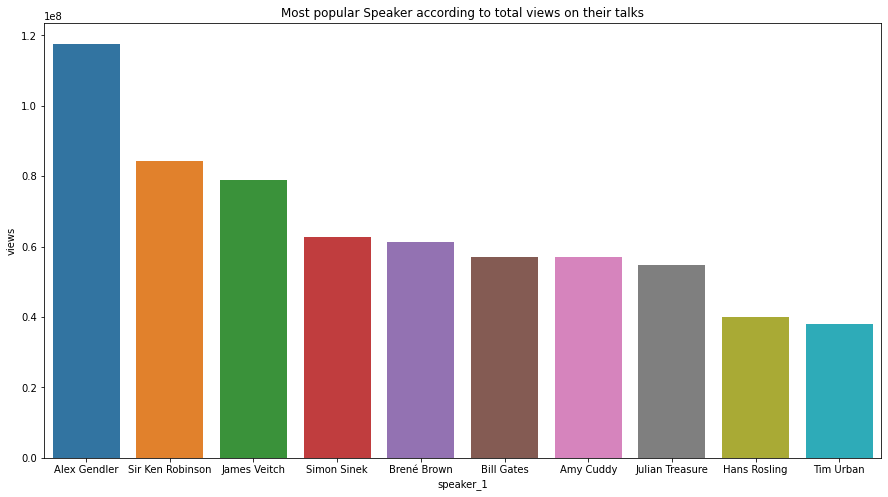

In [13]:
# Barplot to show top 10 popular speakers.

plt.figure(figsize=(15,8))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)



*   **Alex Gendler is the most popular speaker followed by Sir Ken Robinson and James Veitch.**





*   ## Event column



**Let's Check for unique event category in event column.**

In [14]:
# Printing the len of unique values in event column

len(df.event.unique())

459

* **We have 459 unique entries in event column**

**Let's find the most popular event category**

In [15]:
# Extracting top 5 popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(5,['views'])
pop_event_df.reset_index(inplace=True)

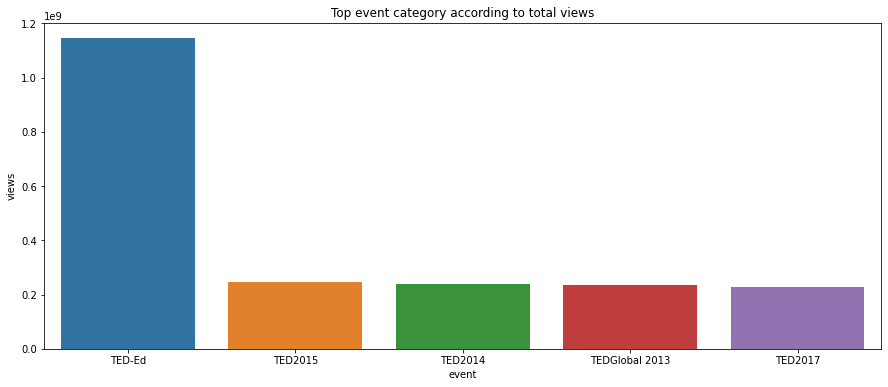

In [16]:
# Barplot to show top 5 popular event

plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

* **TED-Ed is the most popular event category having maximum number of views followed by TED2015.**



*   # native_lang column



In [17]:
# Value count of native_lang column

df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
ko          1
de          1
it          1
pt          1
pt-br       1
zh-cn       1
ar          1
Name: native_lang, dtype: int64

* **Approx 99% values in native_lang column is en.**
* **So, this column is of no use to us and we can remove this column.**

In [18]:
# Dropping the native_lang column

df.drop(columns='native_lang',inplace=True)



*  # Title column



##  **Let's find most frequent words in title and also visualize them.**

There are 157160 words in the combination of all titles.


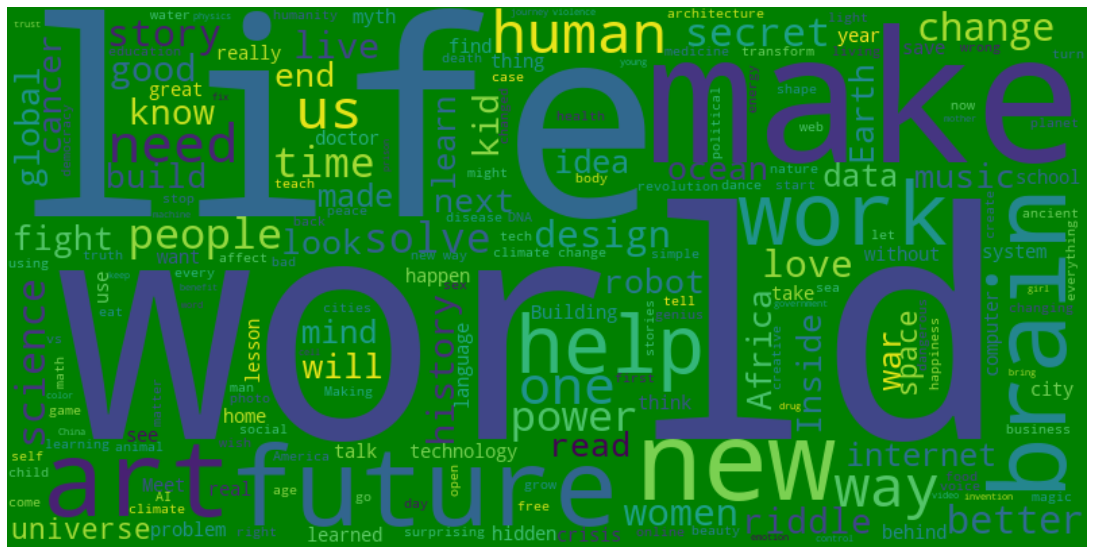

In [19]:
# Making of word cloud from title column

from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="green", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Majoriity of Titles contains words like life, world, make, new, future, art.** 



*   # published_date column



## published_date column is in string format so we need to first convert it into date time format

In [20]:
# Importing datetime library

import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [21]:
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4005, dtype: datetime64[ns]

## Let's extract weekday, month and year and add three separate columns as:


*   publish_day
*   publish_month

*   publish_year





In [22]:
# Extracting publish day, month and year from the published_date column

df['publish_day'] = df['published_date'].apply(lambda x: x.weekday())
df['publish_month']=df['published_date'].apply(lambda x: x.month)
df['publish_year'] = df['published_date'].apply(lambda x: x.year)

In [23]:
# Encoding of publish_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['publish_day']=df['publish_day'].map(week_day)

###**Let's explore publish_day column.**

**Let's check the most frequent publish day of the week.**

In [24]:
# Checking the day of the month having maximum publish date 
freq_rel_day=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,publish_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent publish days')

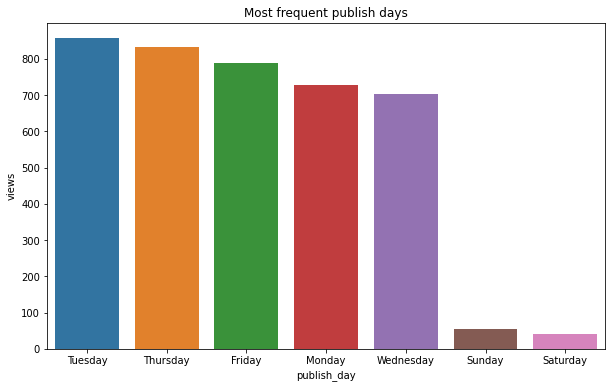

In [25]:
# Checking the day of the week having maximum publish date 
plt.figure(figsize=(10,6))
sns.barplot(x='publish_day',y='views',data=freq_rel_day)
plt.title('Most frequent publish days')

* **Most videos are published on Tuesday followed by Thursday.**

**Let's check the best publish day of the week with respect to average views**

In [26]:
# Publish day of the week with respect to average views

pop_rel_day=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

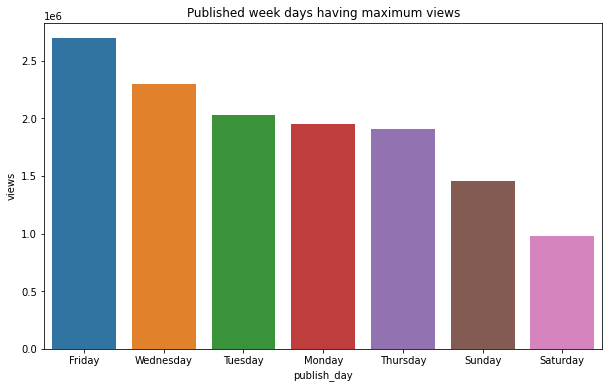

In [27]:
# Barplot to show week days having maximum views

plt.figure(figsize=(10,6))
plt.title('Published week days having maximum views')
sns.barplot(x='publish_day',y='views',data=pop_rel_day)

* **Videos published on Friday are more popular (i.e. have more average views) followed by wednesday.**

###**Let's explore publish_month column**

## Months having maximum average views

In [28]:
# Encoding of publish_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['publish_month']=df['publish_month'].map(month_dict)

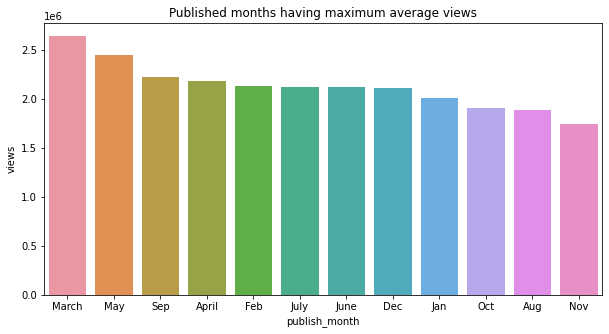

In [29]:
# Most popular publish month according to average Views
pop_rel_month=df[['publish_month','views']].groupby('publish_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

# Barplot showing months having maximum average views
plt.figure(figsize=(10,5))
plt.title('Published months having maximum average views')
sns.barplot(x='publish_month',y='views',data=pop_rel_month)

* **Videos released in March are more popular (i.e. have more average views) followed by May and Sep.**

###**Let's explore publish_year column.**

In [31]:
#checking years having frequent release 
freq_rel_year=df[['publish_year','views']].groupby('publish_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent publish years')

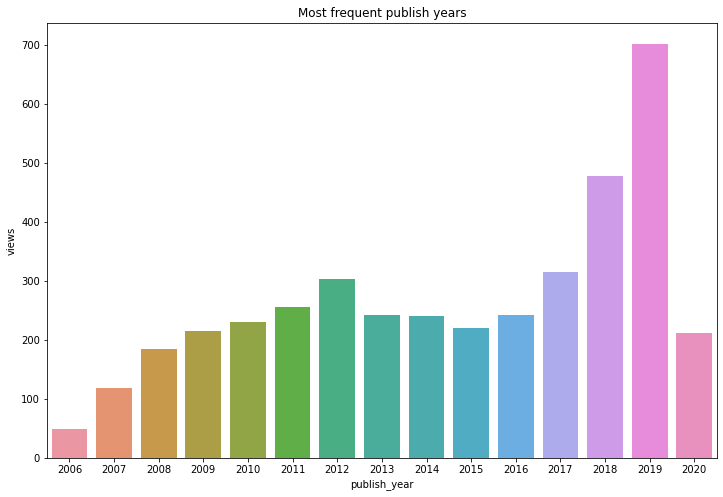

In [34]:
#Plotting the years having frequent release 
plt.figure(figsize=(12,8))
sns.barplot(x='publish_year',y='views',data=freq_rel_year)
plt.title('Most frequent publish years')

* **Most videos are published in 2019 followed by 2018 and 2017.**

##**Let's explore some numerical features.**

Skewness: 8.185744
Kurtosis: 98.737918


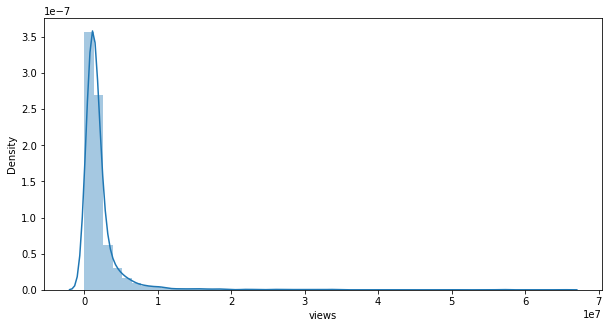

In [38]:
# Distplot to show distribution of views column

plt.figure(figsize=(10,5))
sns.distplot(df['views'])
print("Skewness: %f" % df['views'].skew())
print("Kurtosis: %f" % df['views'].kurt())

Skewness: 8.865357
Kurtosis: 143.035387


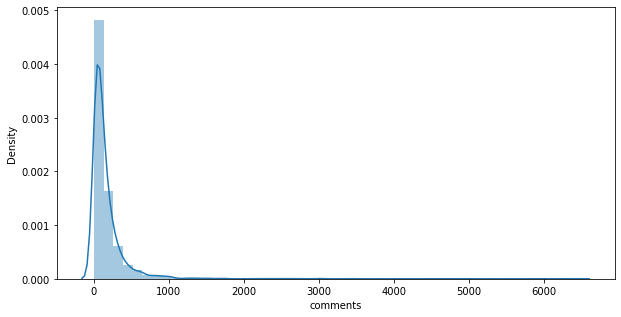

In [40]:
# Distplot to show distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'])
print("Skewness: %f" % df['comments'].skew())
print("Kurtosis: %f" % df['comments'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


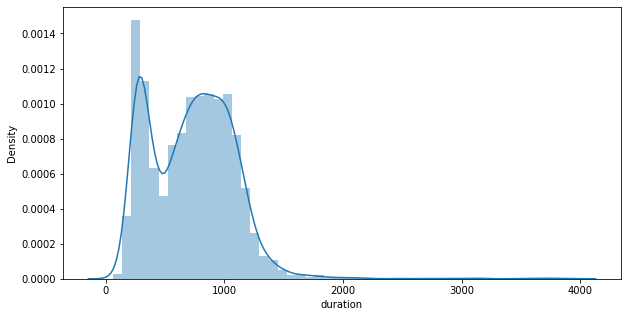

In [41]:
# Distplot to show distribution of duration column.

plt.figure(figsize=(10,5))
sns.distplot(df['duration'])
print("Skewness: %f" % df['duration'].skew())
print("Kurtosis: %f" % df['duration'].kurt())

#**It's time to do some Feature Enginnering.**

###**Feature Engineering on Speaker_1 column**

In [42]:
# Creating a column speaker_1_avg_views.

pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

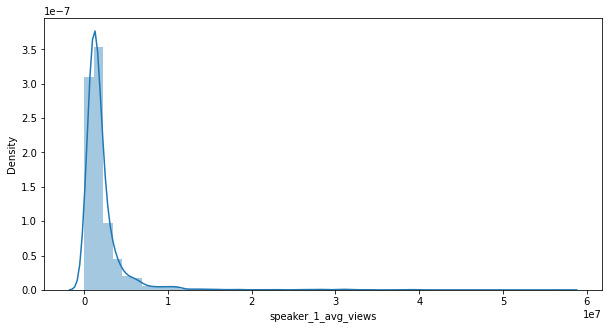

In [43]:
# Distribution of speaker_1_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])